## Forecasting Apple closing  prices using LSTM

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#importing apple stock dataset
data=pd.read_csv('applestock.csv')

In [4]:
#checking top 5 variables
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/08/2020,$124.38,82225510,$124.37,$124.98,$123.09
1,12/07/2020,$123.75,86711990,$122.31,$124.57,$122.25
2,12/04/2020,$122.25,78260420,$122.6,$122.8608,$121.52
3,12/03/2020,$122.94,78967630,$123.52,$123.78,$122.21
4,12/02/2020,$123.08,89004200,$122.02,$123.37,$120.89


In [5]:
#checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2517 non-null   object
 1    Close/Last  2517 non-null   object
 2    Volume      2517 non-null   int64 
 3    Open        2517 non-null   object
 4    High        2517 non-null   object
 5    Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [6]:
# Renaming the columns
data.rename(columns={' Close/Last':'Close',' Volume':'Volume',' Open':'Open',' High':'High',' Low':'Low'},inplace=True)

In [7]:
data.head()

,Date,Close,Volume,Open,High,Low
0,12/08/2020,$124.38,82225510,$124.37,$124.98,$123.09
1,12/07/2020,$123.75,86711990,$122.31,$124.57,$122.25
2,12/04/2020,$122.25,78260420,$122.6,$122.8608,$121.52
3,12/03/2020,$122.94,78967630,$123.52,$123.78,$122.21
4,12/02/2020,$123.08,89004200,$122.02,$123.37,$120.89


In [8]:
#Removing the DOLLAR SIGN ($) in the variables
data=data.replace({'\$':''}, regex = True)
    

In [9]:
#checking if the $ is removed
data.head()

,Date,Close,Volume,Open,High,Low
0,12/08/2020,124.38,82225510,124.37,124.98,123.09
1,12/07/2020,123.75,86711990,122.31,124.57,122.25
2,12/04/2020,122.25,78260420,122.6,122.8608,121.52
3,12/03/2020,122.94,78967630,123.52,123.78,122.21
4,12/02/2020,123.08,89004200,122.02,123.37,120.89


In [10]:
#changing the datatype in the dataset
data=data.astype({'Close':float,'Open':float, 'High':float, 'Low':float})
data['Date']=pd.to_datetime(data.Date)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5   Low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


Text(0, 0.5, 'Stock Value')

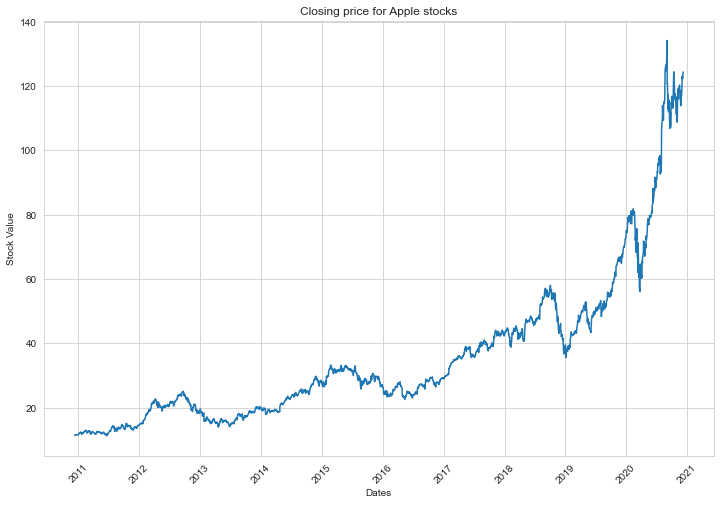

In [12]:
#Plotting the closing value of stocks over 10 years
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'])
plt.title('Closing price for Apple stocks')
plt.xticks(rotation= 45)
plt.xlabel('Dates')
plt.ylabel('Stock Value')

In [13]:
#checking the shape of the dataset
data.shape

(2517, 6)

In [14]:
#spliting the dataset into traning and testing
train_data=data[:2000]
test_data=data[2000:]

In [15]:
#checking the dataset for training and testing
train_data.shape, test_data.shape

((2000, 6), (517, 6))

In [16]:
#extracting the Closing value
#Traning dataset
x_train=train_data['Close'].values
x_train=x_train.reshape(-1,1)

#test data
x_test=test_data['Close'].values
x_test=x_test.reshape(-1,1)

In [17]:
x_train.shape, x_test.shape

((2000, 1), (517, 1))

## Feature scaring

In [18]:
#scaling traning data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(x_train)

In [19]:
scaled_data[0:15]

array([[0.91849126],
       [0.91325141],
       [0.90077558],
       [0.90651446],
       [0.90767887],
       [0.90468467],
       [0.87416048],
       [0.85370012],
       [0.84904248],
       [0.84188967],
       [0.83091094],
       [0.85993804],
       [0.87075042],
       [0.86567692],
       [0.87698834]])

In [20]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
for i in range(50, 2000):
    X_train.append(scaled_data[i-50:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [21]:
X_train.shape, y_train.shape

((1950, 50), (1950,))

In [22]:
#reshaping the data to 3D for easy consumption by LTSM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [23]:
X_train.shape

(1950, 50, 1)

## Building the model 

In [24]:
#import the Necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [25]:
#Creating the model using RELU activation function and dropout regularizer
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


In [26]:
#Compiling the model using ADAM optimizer and Mean Square Error as loss function
model.compile(optimizer='adam',loss='mse')

In [27]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [28]:
#Training the model
model.fit(X_train,y_train,epochs=20,verbose=1,batch_size=20)

Epoch 1/20
98/98 [==============================] - 10s 103ms/step - loss: 0.0118
Epoch 2/20
98/98 [==============================] - 11s 108ms/step - loss: 0.0028
Epoch 3/20
98/98 [==============================] - 10s 104ms/step - loss: 0.0024
Epoch 4/20
98/98 [==============================] - 11s 107ms/step - loss: 0.0020
Epoch 5/20
98/98 [==============================] - 10s 107ms/step - loss: 0.0019
Epoch 6/20
98/98 [==============================] - 11s 109ms/step - loss: 0.0015
Epoch 7/20
98/98 [==============================] - 11s 107ms/step - loss: 0.0017
Epoch 8/20
98/98 [==============================] - 13s 130ms/step - loss: 0.0016
Epoch 9/20
98/98 [==============================] - 11s 110ms/step - loss: 0.0015
Epoch 10/20
98/98 [==============================] - 10s 106ms/step - loss: 0.0016
Epoch 11/20
98/98 [==============================] - 11s 109ms/step - loss: 0.0011
Epoch 12/20
98/98 [==============================] - 11s 109ms/step - loss: 0.0012
Epoch 13/20
9

In [29]:
X_test = []
y_test = []
for i in range(50, 517):
    X_test.append(scaled_data[i-50:i, 0])
    y_test.append(scaled_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [30]:
X_test.shape, y_test.shape

((467, 50), (467,))

In [31]:
#reshaping the data to 3D for easy consumption by LTSM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
#predicted data
pred_data=model.predict(X_test)
#before predicting, use inverse_transform() in the predictions array, because we make predictions using the Scale, so predictions are between 0 and 1.
pred_data=scaler.inverse_transform(pred_data)
#pred_data.shape

In [33]:
#use inverse_tranform 
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

In [34]:
y_test.shape, y_test[0:10]

((467, 1),
 array([[114.96],
        [112.28],
        [108.22],
        [107.12],
        [111.81],
        [110.08],
        [106.84],
        [110.34],
        [112.13],
        [115.54]]))

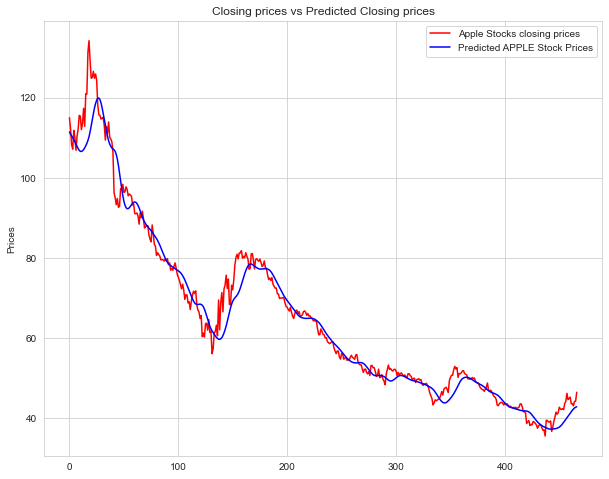

In [35]:
#comparing the real values and predicted values 
plt.figure(figsize=(10,8))
plt.plot(y_test, color = 'red', label = 'Apple Stocks closing prices')
plt.plot(pred_data, color = 'blue', label = 'Predicted APPLE Stock Prices')
plt.title('Closing prices vs Predicted Closing prices')
plt.ylabel('Prices')
plt.legend()